In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [6]:
data.drop('time', axis=1, inplace=True)

In [7]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [8]:
data.shape

(299, 12)

In [9]:
#sns.pairplot(data, hue="DEATH_EVENT", diag_kind="hist")

In [10]:
death = data['DEATH_EVENT'].value_counts()
death

0    203
1     96
Name: DEATH_EVENT, dtype: int64

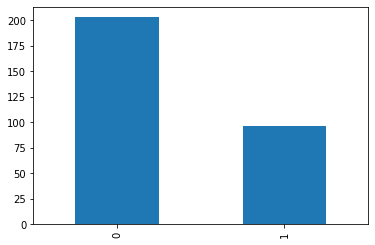

In [11]:
death.plot.bar()

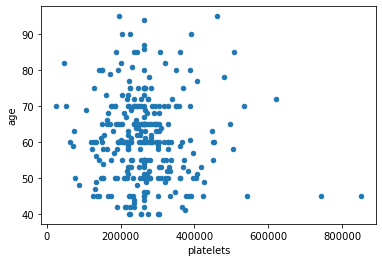

In [12]:
data.plot.scatter('platelets','age')

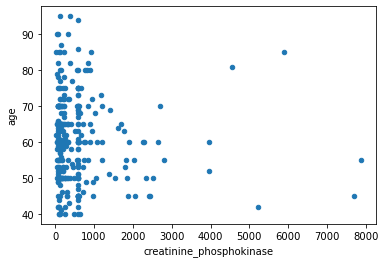

In [13]:
data.plot.scatter('creatinine_phosphokinase', 'age')

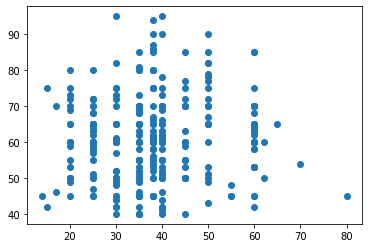

In [14]:
plt.scatter(data.ejection_fraction, data.age)

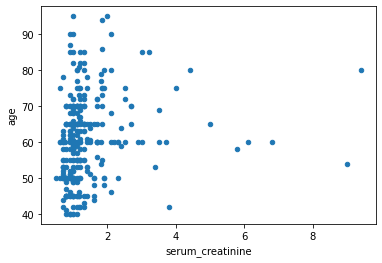

In [15]:
data.plot.scatter('serum_creatinine', 'age')

In [16]:
label = data['DEATH_EVENT']

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [18]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(239, 12)
(239,)
(60, 12)
(60,)


In [20]:
x_train

array([[0.63636364, 1.        , 0.02845114, ..., 1.        , 0.        ,
        1.        ],
       [0.63636364, 0.        , 0.00969635, ..., 1.        , 0.        ,
        1.        ],
       [0.37576364, 1.        , 0.01033427, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.27272727, 0.        , 0.09249809, ..., 1.        , 0.        ,
        0.        ],
       [0.07272727, 0.        , 0.07131921, ..., 1.        , 1.        ,
        0.        ],
       [0.72727273, 0.        , 0.11163562, ..., 1.        , 1.        ,
        0.        ]])

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.optimizers import SGD, Adam, Nadam, RMSprop

In [22]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim = x_train.shape[1]))
model.add(Dense(200,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

In [23]:
s = SGD(learning_rate=0.0001)
a = Adam(learning_rate=0.01)
na = Nadam(learning_rate=0.0001)
rms = RMSprop(learning_rate=0.001)

In [24]:
model.compile(optimizer=s, loss = 'binary_crossentropy', metrics='accuracy')

In [25]:
history = model.fit(x_train, y_train, epochs=100, validation_data = (x_test, y_test)) 

Epoch 1/100
8/8 [==============================] - 0s 31ms/step - loss: 0.6129 - accuracy: 0.7155 - val_loss: 0.6893 - val_accuracy: 0.7500
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6011 - accuracy: 0.7448 - val_loss: 0.6887 - val_accuracy: 0.7667
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5960 - accuracy: 0.7615 - val_loss: 0.6880 - val_accuracy: 0.8167
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5860 - accuracy: 0.7406 - val_loss: 0.6872 - val_accuracy: 0.8333
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5746 - accuracy: 0.7950 - val_loss: 0.6864 - val_accuracy: 0.8500
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5693 - accuracy: 0.8285 - val_loss: 0.6855 - val_accuracy: 0.8500
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5616 - accuracy: 0.8159 - val_loss: 0.6844 - val_accuracy: 0.8833
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.9958 - val_loss: 0.4588 - val_accuracy: 1.0000
Epoch 60/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2676 - accuracy: 1.0000 - val_loss: 0.4503 - val_accuracy: 1.0000
Epoch 61/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2610 - accuracy: 1.0000 - val_loss: 0.4414 - val_accuracy: 1.0000
Epoch 62/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2580 - accuracy: 0.9958 - val_loss: 0.4324 - val_accuracy: 1.0000
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2815 - accuracy: 1.0000 - val_loss: 0.4235 - val_accuracy: 1.0000
Epoch 64/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2788 - accuracy: 1.0000 - val_loss: 0.4142 - val_accuracy: 1.0000
Epoch 65/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2539 - accuracy: 1.0000 - val_loss: 0.4050 - val_accuracy: 1.0000
Epoch 66/100
8/8 [===============

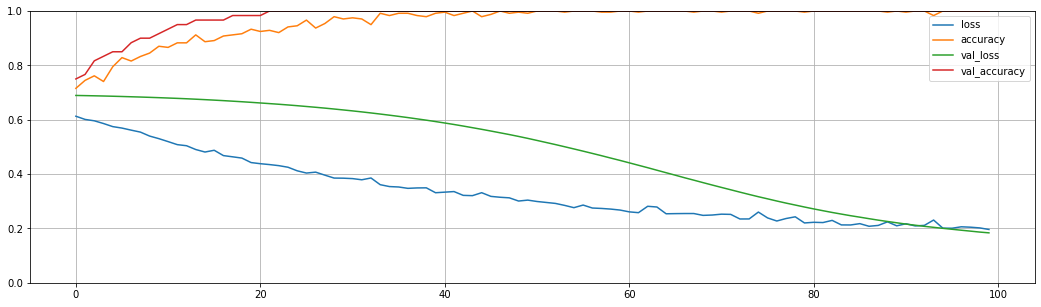

In [26]:
pd.DataFrame(history.history).plot(figsize=(18, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()